# <center>L2 Computational Physics</center>
---
## Week 4: Differential Equations II

In this notebook, you will write a program to study the trajectory of a spherical, iron cannonball in the presence of gravity and drag forces. 

In [ ]:
import numpy
from matplotlib import pyplot as plt

In [2]:
# Define all constants to be used in the simulation
r_cb = 0.15  # Radius of cannonball in m
rho_iron = 7874  # Density of iron in kg/m^3
g = 9.81  # Acceleration due to gravity in m/s^2
kappa = 0.47  # Drag coefficient of a sphere
rho_air = 1.23  # Density of air in kg/m^3
v0 = 125.00  # Initial speed in m/s

From this information, calculate the following two variables:

In [4]:
import numpy
from matplotlib import pyplot as plt
def get_area(r):
    ''' 
    This function returns the cross section area of a sphere of radius r. The returned 
    value is in the squared units of the unit of the radius argument.
    '''
    # YOUR CODE HERE
    z = numpy.pi*((r)**2)
    return(z);                    
                    
def get_mass(r):
    ''' 
    This function returns the mass of an iron sphere of radius r. The radius 
    should be given in meter and the return value is in kg.
    '''
    # YOUR CODE HERE
    z = (4/3)*numpy.pi*((r)**3)*rho_iron
    return(z);

area_cb = get_area(r_cb)
mass_cb = get_mass(r_cb)

In [5]:
# these tests are worth one mark
assert numpy.isclose(area_cb, 0.07068583470577035)
assert numpy.isclose(mass_cb, 111.31605249464711)

## The Differential Equations

Create a function `f` which calculates the right-hand side of the differential equation

$$ \frac{d}{dt}\left(\begin{array}{c}x\\y\\v_x \\v_y \end{array}\right) = f(x, y, v_x, v_y, t)$$

such that the differential equation represents the cannonball's motion as it moves through the air. 

- *Your function should accept two arguments:*
    - `r` *- a numpy array representing the cannonball's state, $(x, y, v_{x}, v_{y})$.*
    - `t` *- Time * 
    
- *The drag force experienced by the cannonball is given by $$\vec{F}_{\textrm{d}} = - \frac{1}{2} C_{\textrm{d}} \rho |\vec{v}|^{2} A \widehat{v}~,$$ where $\widehat{v}$ is a unit vector pointing in the direction of the cannonball's instantaneous velocity.*

In [12]:
import numpy
from matplotlib import pyplot as plt
def f(r, t):
    '''Implements differential equation for cannonball from state vector r and time t'''
    
    # Unpack array of the state
    x, y, vx, vy = r
    
    # these variables should updated in your code to be the derivatives of 
    # the x, y positions and the derivative of the x, y velocities. 
    dx_t, dy_dt, dvx_dt, dvy_dt = 0, 0, 0, 0
    
    # YOUR CODE HERE
    vectorx = vx/(vx**2+vy**2)**0.5
    vectory = vy/(vx**2+vy**2)**0.5
    
    fdx = -1/2*kappa*rho_air*area_cb*(vx**2+vy**2)*vectorx
    fdy = -1/2*kappa*rho_air*area_cb*(vx**2+vy**2)*vectory 
    
    dvx_dt = fdx / mass_cb
    dvy_dt = (fdy / mass_cb) - g
    dx_dt = vx + t*(dvx_dt)
    dy_dt = vy + t*(dvy_dt)
    return numpy.array([dx_dt, dy_dt, dvx_dt, dvy_dt]);


    

[ 88.38834765  88.38834765  -2.0279283  -11.8379283 ]


Check your result:

In [13]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert len(f(r_test, 0))== 4

In [14]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(f(r_test, 0), [ 88.38834765,  88.38834765,  -2.0279283 , -11.8379283 ]).all()

## Solving the Differential Equations

Create the function `solve_euler(state_initial, t1, n_panels)` which solves the differential equations using Euler's method.

- `state_initial` *is a numpy array containing the initial conditions $(x_{0}, y_{0}, v_{x0}, v_{y0})$*
- *When working with a numpy array, you can use the same commands as those used for single variables - for instance,* `state += f(state, t)`.
- *This function should record all state values at each timepoint in the variable `history` and return it. This will be similar to last week, only this time you will have to populate a 2D array.* 


In [95]:
import numpy
def solve_euler(state_initial, t1, n_steps):
    '''Solves ODE using Euler's method from state_initial to end time t1 using n_panels panels'''
   # Define array for trajectory history
    x, y, vx, vy = state_initial

    dt = t1 / n_steps
    
    history = numpy.empty((n_steps+1,4))  # Number of columns is equal to number of variables to solve for (4)
    history[0] = state_initial
    for i in range(n_steps):
        
        
        vectorx = vx/(vx**2+vy**2)**0.5
        vectory = vy/(vx**2+vy**2)**0.5
        ya = ((-1/2*kappa*rho_air*area_cb*(vx**2+vy**2)*vectory)/mass_cb) - g
        xa = (-1/2*kappa*rho_air*area_cb*(vx**2+vy**2)*vectorx)/mass_cb
        y = y + vy*dt
        x = x + vx*dt
        vy = vy +(ya*dt)
        vx =  vx +(xa*dt)
        history[i+1] = [x,y,vx,vy]
        print(x,y,vx,vy)
        
    #return history
    return(history)


Test your solution:

In [96]:
# this test is worth 4 marks
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(solve_euler(r_test, 25.0, 10), numpy.array(
    [[   0.        ,    0.        ,   88.38834765,   88.38834765],
     [ 220.97086912,  220.97086912,   83.3185269 ,   58.7935269 ],
     [ 429.26718637,  367.95468637,   79.41984538,   31.51743125],
     [ 627.81679983,  446.7482645 ,   76.30595276,    5.75669607],
     [ 818.58168171,  461.14000469,   73.62655732,  -18.97044366],
     [1002.64807501,  413.71389553,   71.05785323,  -42.83359748],
     [1180.2927081 ,  306.62990184,   68.35253688,  -65.72783569],
     [1351.1740503 ,  142.31031262,   65.37829955,  -87.3928075 ],
     [1514.61979917,  -76.17170612,   62.10406078, -107.54105068],
     [1669.87995113, -345.02433282,   58.56508321, -125.93786257],
     [1816.29265915, -659.86898925,   54.83262575, -142.43661744]])).all()

220.97086912079607 220.97086912079607 83.31852689970225 58.79352689970224
429.2671863700517 367.95468637005166 79.41984538205064 31.51743125254383
627.8167998251784 446.7482645014112 76.3059527557027 5.7566960744329805
818.5816817144351 461.1400046874937 73.62655731998245 -18.97044366210955
1002.6480750143912 413.7138955322198 71.05785323249769 -42.83359747576023
1180.2927080956354 306.6299018428192 68.35253688009419 -65.72783568924389
1351.1740502958708 142.3103126197095 65.37829955149601 -87.39280749778334
1514.6197991746108 -76.17170612474885 62.104060782558825 -107.54105067788285
1669.8799511310078 -345.02433281945594 58.565083209457946 -125.93786257325547
1816.2926591546527 -659.8689892525946 54.83262575491392 -142.43661744201015


## Finding the range

To find the range of the projectile we will look for the $x$ coordinate when the trajectory crosses the $y=0$ line. In most cases that point will not be one of the steps but will be between two steps. We will use a linear approximation to determine this point given the last point with a positive $y$ value and the first point with a negative $y$ value. Implement the function `find_zero_linear` that takes as argument the two values of $x$ `x1` and `x2` and the heights `y1` and `y2` and returns the value of $x$ at which the line between $(x_1,y_1)$ and $x_2,y_2$ crosses the $y=0$ line.  

In [102]:
def find_zero_linear(x1, x2, y1, y2):
    if y1*y2 > 0:
        print("I expect y1 and y2 to have opposite signs!")
    # YOUR CODE HERE
    else:
        return(x1 - (y1/((y2-y1)/(x2-x1))))


0.0
-0.5


In [98]:
# these tests are worth 2 marks
assert numpy.isclose(find_zero_linear(-1,1,3,-3),0.0)
assert numpy.isclose(find_zero_linear(-1,1,1,-3), -0.5)

Given the function above we can define a function to determine the range. (Don't modify it!)

In [99]:
def find_range(history):
    all_xs = history[:,0]
    all_ys = history[:,1]
    negatives = numpy.argwhere(all_ys<0)
    if len(negatives) == 0 :
        print ("The projectile did not touch down! Returning the last known location")
        return all_xs[-1]
    (index,) = negatives[0]
    y1, y2 = all_ys[index-1], all_ys[index]
    x1, x2 = all_xs[index -1], all_xs[index]
    return find_zero_linear(x1,x2,y1,y2)

In [100]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
h = solve_euler(r_test, 25.0, 10000)
assert numpy.isclose(find_range(h),1306.2541)

0.22097086912079608 0.22097086912079608 88.38327782756981 88.35875282756982
0.4419290636897206 0.44186775118972066 88.37820929166803 88.32916069810878
0.6628745869188907 0.6626906529349926 88.37314204021374 88.29957125890378
0.8838074420194251 0.8834395810822521 88.3680760728077 88.26998450892366
1.1047276322014443 1.1041145423545613 88.36301138905077 88.2404004471376
1.3256351606740713 1.3247155434724054 88.35794798854391 88.21081907251518
1.546530030645431 1.5452425911536933 88.3528858708882 88.1812403840263
1.7674122453226515 1.765695692113759 88.3478250356848 88.15166438064124
1.9882818079118636 1.986074853065362 88.342765482535 88.12209106133064
2.209138721618201 2.206380080718689 88.33770721104017 88.0925204250655
2.4299829896458016 2.4266113817813526 88.33265022080178 88.06295247081721
2.650814615197806 2.646768762958396 88.32759451142142 88.03338719755747
2.8716336014763595 2.8668522309522895 88.32254008250078 88.0038246042584
3.0924399516826115 3.0868617924629356 88.3174869336

140.6701320720525 127.96512276093598 85.35509522684453 69.73102755616581
140.8835198101196 128.1394503298264 85.3507783686441 69.70297588962845
141.09689675604122 128.31370776955046 85.34646255470741 69.6749263163261
141.310262912428 128.48789508534128 85.34214778468635 69.64687883543714
141.5236182818897 128.66201228242988 85.33783405823286 69.61883344614023
141.7369628670353 128.83605936604525 85.33352137499894 69.59079014761436
141.9502966704728 129.0100363414143 85.32920973463665 69.56274893903877
142.1636196948094 129.1839432137619 85.32489913679811 69.53470981959302
142.3769319426514 129.35777998831088 85.3205895811355 69.50667278845694
142.59023341660424 129.531546670282 85.31628106730102 69.47863784481066
142.80352411927248 129.70524326489405 85.31197359494698 69.45060498783461
143.01680405325985 129.87886977736363 85.30766716372571 69.42257421670949
143.23007322116916 130.0524262129054 85.30336177328962 69.39454553061633
143.44333162560238 130.22591257673193 85.29905742329116 

246.06953751619992 206.48356066456248 83.31985955202019 55.95004479986709
246.27783716507997 206.62343577656213 83.3160224173681 55.922943128988834
246.48612722112338 206.7632431343846 83.31218615875507 55.89584317562428
246.69440768652026 206.90298274232364 83.30835077585394 55.86874493909018
246.9026785634599 207.04265460467136 83.30451626833764 55.84164841870356
247.11093985413072 207.18225872571813 83.30068263587907 55.814553613781726
247.3191915607204 207.32179510975257 83.2968498781512 55.78746052364223
247.5274336854158 207.46126376106167 83.29301799482703 55.7603691476029
247.73566623040284 207.6006646839307 83.28918698557953 55.73327948498182
247.94388919786678 207.73999788264314 83.28535685008177 55.70619153509735
248.15210258999198 207.8792633614809 83.2815275880068 55.679105297268116
248.360306408962 208.01846112472407 83.27769919902772 55.65202077081299
248.56850065695957 208.1575911766511 83.27387168281766 55.624937955051124
248.77668533616662 208.29665352153873 83.270045

349.0659204175516 268.0534737272366 81.50386421369258 42.5999961596021
349.2696800780858 268.15997371763564 81.50042475290692 42.57367344095804
349.47343113996806 268.26640790123804 81.49698600716506 42.547352130831996
349.67717360498597 268.3727762815651 81.49354797614845 42.52103222867098
349.88090747492635 268.47907886213676 81.49011065953854 42.49471373392226
350.0846327515752 268.58531564647154 81.48667405701683 42.46839664603336
350.28834943671774 268.69148663808664 81.48323816826476 42.442080964452074
350.4920575321384 268.7975918404978 81.47980299296385 42.41576668862645
350.6957570396208 268.90363125721933 81.47636853079558 42.38945381800478
350.8994479609478 269.00960489176435 81.47293478144145 42.363142352035645
351.1031302979014 269.11551274764446 81.46950174458298 42.336832290167855
351.3068040522628 269.2213548283699 81.46606941990169 42.3105236318505
351.5104692258126 269.3271311374495 81.46263780707908 42.28421637653292
351.7141258203303 269.43284167839084 81.4592069057

449.9080420862224 313.1636004615502 79.86675245914513 29.603567125569686
450.1077089673703 313.2376093793641 79.86363087974983 29.57788507482803
450.30736804456967 313.31155409205115 79.86050985661856 29.55220418869468
450.5070193192112 313.3854346025229 79.8573893894341 29.526524466748068
450.7066627926848 313.45925091368974 79.85426947787924 29.500845908566877
450.9062984663795 313.53300302846117 79.85115012163675 29.475168513730065
451.1059263416836 313.6066909497455 79.84803132038941 29.44949228181686
451.3055464199846 313.68031468045 79.84491307382001 29.423817212406757
451.5051587026691 313.75387422348103 79.84179538161132 29.39814330507952
451.70476319112316 313.8273695817437 79.83867824344613 29.37247055941518
451.90435988673175 313.9008007581422 79.8355616590072 29.346798974994044
452.10394879087926 313.9741677555797 79.83244562797734 29.321128551396676
452.3035299049492 314.0474705769582 79.82933015003931 29.29545928820392
452.50310323032426 314.1207092251787 79.8262152248759

548.5987692630993 342.1739117232576 78.37167314122752 16.92494250224352
548.7946984459523 342.2162240795132 78.36878974730321 16.899794811998127
548.9906204203206 342.2584735665432 78.36590675158358 16.874648109962628
549.1865351871996 342.3006601868181 78.36302415375319 16.84950239585305
549.382442747584 342.3427839428077 78.36014195349661 16.824357669385716
549.5783431024678 342.3848448369812 78.35726015049842 16.799213930277215
549.774236252844 342.42684287180685 78.35437874444321 16.77407117824443
549.9701221997052 342.4687780497525 78.35149773501558 16.74892941300452
550.1660009440427 342.510650373285 78.34861712190016 16.723788634274936
550.3618724868475 342.55245984487067 78.34573690478156 16.698648841773398
550.5577368291094 342.5942064669751 78.34285708334441 16.67351003521792
550.7535939718178 342.6358902420631 78.33997765727337 16.64837221432679
550.9494439159611 342.67751117259894 78.33709862625308 16.62323537881859
551.1452866625267 342.719069261046 78.3342199899682 16.598

645.682697591208 355.53666933597765 76.97315802340266 4.469227051167493
645.8751304862665 355.54784240360556 76.97043471387975 4.444543929961335
646.0675565730512 355.55895376343045 76.9677116471266 4.419861690498499
646.2599758521691 355.5700034176567 76.96498882283927 4.395180332637521
646.4523883242261 355.5809913684883 76.96226624071389 4.370499856237219
646.6447939898279 355.5919176181289 76.95954390044659 4.345820261156693
646.8371928495791 355.6027821687818 76.95682180173357 4.321141547255332
647.0295849040834 355.61358502264994 76.95409994427104 4.296463714392804
647.2219701539441 355.62432618193594 76.95137832775528 4.271786762429063
647.4143485997635 355.635005648842 76.94865695188258 4.247110691224346
647.6067202421432 355.6456234255701 76.9459358163493 4.222435500639176
647.7990850816841 355.65617951432165 76.94321492085182 4.197761190534358
647.9914431189862 355.666673917298 76.94049426508654 4.173087760770979
648.183794354649 355.67710663669993 76.93777384874994 4.1484152

741.0604546129056 353.4700733356551 75.63561170297668 -7.764542864586103
741.249543642163 353.45066197849366 75.63297284111017 -7.7887969663198655
741.4386260742657 353.43118998607787 75.63033407631966 -7.813050222364509
741.6277019094565 353.41165736052193 75.62769540832937 -7.837302632724651
741.8167711479773 353.39206410394013 75.62505683686366 -7.86155419740465
742.0058337900695 353.3724102184466 75.62241836164692 -7.885804916408608
742.1948898359735 353.35269570615554 75.61977998240361 -7.910054789740367
742.3839392859295 353.33292056918117 75.6171416988583 -7.934303817403512
742.5729821401767 353.31308480963764 75.61450351073563 -7.95855199940137
742.7620183989535 353.29318842963914 75.61186541776028 -7.98279933573701
742.9510480624979 353.2732314312998 75.60922741965705 -8.007045826413243
743.140071131047 353.25321381673376 75.60658951615076 -8.031291471432624
743.3290876048374 353.2331355880552 75.60395170696637 -8.055536270797448
743.5180974841047 353.21299674737816 75.6013139

834.785277338132 336.244059475367 74.32278974673495 -19.785548616292797
834.9710843124989 336.19459560382626 74.32016673871236 -19.809375342547572
835.1568847293456 336.1450721654699 74.31754370054506 -19.833201195198015
835.342678588597 336.0954891624819 74.31492063200244 -19.857026174132137
835.528465890177 336.0458465970466 74.312297532854 -19.880850279237748
835.7142466340091 335.9961444713485 74.30967440286935 -19.904673510402453
835.9000208200163 335.9463827875725 74.30705124181819 -19.92849586751365
836.0857884481209 335.8965615479037 74.30442804947033 -19.952317350458536
836.2715495182446 335.84668075452754 74.3018048255957 -19.976137959124102
836.4573040303086 335.7967404096297 74.29918156996429 -19.99995769339714
836.6430519842335 335.7467405153962 74.29655828234624 -20.023776553164232
836.8287933799394 335.69668107401327 74.29393496251177 -20.047594538311763
837.0145282173456 335.6465620876675 74.29131161023122 -20.071411648725913
837.2002564963713 335.5963835585457 74.28868

949.6294478287223 293.8041874351003 72.66887326276026 -34.50118384689696
949.8111200118792 293.71793447548305 72.66619085404241 -34.524435312959085
949.9927854890143 293.63162338720065 72.66350829251851 -34.54768580110266
950.1744442597455 293.54525417269787 72.660825578028 -34.570935311114766
950.3560963236906 293.45882683442005 72.65814271041043 -34.594183842782385
950.5377416804666 293.3723413748131 72.65545968950549 -34.617431395892375
950.7193803296904 293.2857977963234 72.65277651515298 -34.64067797023148
950.9010122709782 293.1991961013978 72.6500931871928 -34.663923565586316
951.0826375039462 293.1125362924838 72.64740970546495 -34.687168181743395
951.2642560282098 293.02581837202945 72.64472606980961 -34.71041181848911
951.4458678433843 292.9390423424832 72.642042280067 -34.73365447560973
951.6274729490846 292.8522082062942 72.63935833607752 -34.75689615289142
951.8090713449247 292.765315965912 72.63667423768163 -34.780136850120215
951.9906630305189 292.6783656237867 72.633989

1039.6200928903052 243.4782220898226 71.3055771639893 -46.00024480594194
1039.7983568332152 243.36322147780774 71.30280069619594 -46.02297866696979
1039.9766138349557 243.2481640311403 71.30002400954199 -46.045711431750526
1040.1548638949796 243.13304975256094 71.29724710392318 -46.06844310002907
1040.3331070127394 243.01787864481085 71.2944699792354 -46.09117367155031
1040.5113431876875 242.90265071063197 71.29169263537463 -46.11390314605906
1040.689572419276 242.78736595276683 71.28891507223695 -46.136631523300096
1040.8677947069566 242.67202437395858 71.28613728971854 -46.159358803018144
1041.046010050181 242.55662597695104 71.28335928771571 -46.18208498495787
1041.2242184484003 242.44117076448865 71.28058106612487 -46.204810068863885
1041.4024199010655 242.32565873931648 71.27780262484254 -46.227534054480756
1041.5806144076275 242.21008990418028 71.27502396376532 -46.25025694155299
1041.758801967537 242.0944642618264 71.27224508278996 -46.272978729825056
1041.936982580244 241.97878

1123.1540340855677 182.78795925259485 69.96626595814969 -56.62643235922977
1123.3289497504632 182.64639317169676 69.96337615760575 -56.6486185307559
1123.5038581908573 182.50477162536987 69.96048610037523 -56.67080348145332
1123.6787594061082 182.36309461666625 69.95759578640133 -56.692987211054195
1123.8536533955742 182.2213621486386 69.95470521562729 -56.71516971929068
1124.0285401586132 182.07957422434038 69.95181438799648 -56.737351005894915
1124.203419694583 181.93773084682564 69.94892330345235 -56.75953107059905
1124.3782920028418 181.79583201914915 69.94603196193844 -56.781709913135245
1124.5531570827466 181.6538777443663 69.9431403633984 -56.803887533235624
1124.728014933655 181.5118680255332 69.94024850777595 -56.82606393063233
1124.9028655549243 181.36980286570662 69.9373563950149 -56.848239105057495
1125.0777089459118 181.22768226794398 69.93446402505917 -56.87041305624326
1125.2525451059744 181.08550623530337 69.93157139785276 -56.892585783921746
1125.427374034469 180.94327

1192.8807997887739 121.44134302741676 68.78336189227674 -65.44399853457358
1193.0527581935046 121.27773303108033 68.78036527426458 -65.46567239936586
1193.2247091066902 121.11406885008192 68.77736838375147 -65.48734493628622
1193.3966525276496 120.9503504877412 68.77437122071463 -65.5090161450721
1193.5685884557015 120.78657794737852 68.77137378513136 -65.53068602546092
1193.7405168901644 120.62275123231487 68.76837607697904 -65.55235457719017
1193.9124378303568 120.45887034587189 68.76537809623512 -65.57402179999735
1194.0843512755973 120.2949352913719 68.76237984287717 -65.59568769362
1194.2562572252045 120.13094607213785 68.75938131688275 -65.61735225779564
1194.4281556784968 119.96690269149336 68.75638251822959 -65.63901549226189
1194.6000466347923 119.8028051527627 68.75338344689543 -65.66067739675634
1194.7719300934095 119.63865345927081 68.7503841028581 -65.68233797101665
1194.9438060536668 119.47444761434328 68.74738448609556 -65.70399721478049
1195.115674514882 119.31018762130

1285.3013888174169 24.525564856992897 67.11261071167782 -77.03157886779098
1285.469170344196 24.33298590982342 67.10946441506799 -77.05249256146762
1285.6369440052338 24.14035467841975 67.10631784398316 -77.07340479019577
1285.8047097998437 23.947671166444263 67.10317099843714 -77.09431555373676
1285.9724677273398 23.75493537755992 67.10002387844379 -77.115224851852
1286.140217787036 23.56214731543029 67.09687648401706 -77.13613268430292
1286.307959978246 23.369306983719532 67.09372881517092 -77.15703905085103
1286.4756943002837 23.176414386092404 67.09058087191941 -77.17794395125789
1286.6434207524635 22.983469526214257 67.08743265427665 -77.19884738528512
1286.8111393340992 22.790472407751043 67.0842841622568 -77.2197493526944
1286.9788500445047 22.597423034369307 67.08113539587406 -77.24064985324745
1287.1465528829945 22.404321409736188 67.07798635514271 -77.26154888670607
1287.3142478488824 22.211167537519422 67.0748370400771 -77.28244645283212
1287.4819349414825 22.01796142138734 

1360.8189513837688 -68.43988725239198 65.65300845751051 -86.39238757053394
1360.9830839049125 -68.65586822131831 65.64973954327999 -86.41261102652594
1361.1472082537707 -68.87189974888463 65.64647036630898 -86.4328329155016
1361.3113244296865 -69.08798183117338 65.6432009266342 -86.45305323725218
1361.4754324320031 -69.3041144642665 65.63993122429243 -86.47327199156896
1361.6395322600638 -69.52029764424543 65.6366612593205 -86.49348917824335
1361.803623913212 -69.73653136719103 65.63339103175528 -86.51370479706678
1361.9677073907915 -69.9528156291837 65.63012054163366 -86.53391884783079
1362.1317826921456 -70.16915042630328 65.62684978899259 -86.55413133032697
1362.295849816618 -70.38553575462909 65.62357877386906 -86.57434224434698
1362.4599087635527 -70.60197161023996 65.62030749630011 -86.59455158968258
1362.6239595322934 -70.81845798921417 65.61703595632282 -86.61475936612558
1362.7880021221843 -71.03499488762948 65.61376415397432 -86.63496557346787
1362.952036532569 -71.2515823015

1441.8523794118864 -182.6551403803672 63.98663960552776 -96.30450000156574
1442.0123460109003 -182.8959016303711 63.983244730029114 -96.32391546949029
1442.1723041227253 -183.13671141904481 63.97984961499536 -96.34332927553785
1442.3322537467627 -183.37756974223365 63.97645426048152 -96.36274141953862
1442.492194882414 -183.61847659578248 63.97305866654265 -96.38215190132283
1442.6521275290804 -183.85943197553578 63.96966283323383 -96.40156072072081
1442.8120516861636 -184.1004358773376 63.96626676061018 -96.42096787756296
1442.971967353065 -184.3414882970315 63.96287044872685 -96.4403733716798
1443.131874529187 -184.5825892304607 63.959473897639 -96.45977720290188
1443.291773213931 -184.82373867346797 63.956077107401846 -96.47917937105987
1443.4516634066995 -185.0649366218956 63.95268007807062 -96.49857987598452
1443.6115451068947 -185.30618307158556 63.94928280970059 -96.51797871750664
1443.771418313919 -185.54747801837934 63.94588530234705 -96.53737589545713
1443.931283027175 -185.7

1539.9986124481186 -342.15498055548306 61.82406595416731 -108.09039857828606
1540.153172613004 -342.4252065519288 61.82053337811664 -108.10874738221368
1540.3077239464494 -342.69547842038435 61.817000601827495 -108.12709443455564
1540.4622664479539 -342.96579615647073 61.81346762536945 -108.1454397351947
1540.6168001170172 -343.2361597558087 61.8099344488121 -108.16378328401368
1540.7713249531391 -343.5065692140188 61.80640107222508 -108.18212508089547
1540.9258409558197 -343.777024526721 61.802867495678015 -108.20046512572311
1541.080348124559 -344.0475256895353 61.79933371924057 -108.21880341837966
1541.234846458857 -344.31807269808127 61.79579974298241 -108.2371399587483
1541.3893359582144 -344.5886655479781 61.79226556697323 -108.25547474671228
1541.5438166221318 -344.8593042348449 61.78873119128273 -108.27380778215493
1541.6982884501099 -345.1299887543003 61.78519661598063 -108.2921390649597
1541.8527514416498 -345.4007191019627 61.781661841136675 -108.31046859501008
1542.00720559

1597.4863631851288 -446.9552179467388 60.482325031556925 -114.86510138506522
1597.6375689977076 -447.24238070020147 60.47872220704784 -114.88278407531119
1597.7887658032253 -447.5295876603897 60.47511920951268 -114.90046497588662
1597.939953601249 -447.8168388228294 60.47151603902621 -114.91814408670619
1598.0911323913467 -448.1041341830462 60.46791269566324 -114.93582140768467
1598.2423021730858 -448.3914737365654 60.46430917949855 -114.95349693873693
1598.3934629460346 -448.6788574789122 60.46070549060696 -114.97117067977791
1598.5446147097612 -448.96628540561164 60.457101629063295 -114.98884263072264
1598.6957574638338 -449.25375751218843 60.45349759494238 -115.00651279148623
1598.8468912078213 -449.5412737941671 60.44989338831905 -115.02418116198389
1598.9980159412921 -449.8288342470721 60.446289009268156 -115.0418477421309
1599.1491316638153 -450.1164388664274 60.44268445786457 -115.05951253184261
1599.30023837496 -450.404087647757 60.43907973418317 -115.0771755310345
1599.4513360

1671.957167866396 -595.9582349021133 58.66090007717546 -123.48163366060767
1672.103820116589 -596.2669389862648 58.657220252038776 -123.49841260115639
1672.250463167219 -596.5756850177677 58.65354029229935 -123.51518971974805
1672.3970970179498 -596.884472992067 58.649860198035526 -123.53196501633855
1672.543721668445 -597.1933029046079 58.646179969325665 -123.54873849088386
1672.6903371183682 -597.5021747508351 58.64249960624812 -123.56551014334005
1672.8369433673838 -597.8110885261935 58.63881910888126 -123.58227997366325
1672.983540415156 -598.1200442261277 58.635138477303435 -123.59904798180968
1673.1301282613495 -598.4290418460822 58.63145771159302 -123.61581416773564
1673.2767069056285 -598.7380813815015 58.62777681182839 -123.6325785313975
1673.4232763476582 -599.04716282783 58.62409577808792 -123.64934107275172
1673.5698365871035 -599.3562861805119 58.62041461044999 -123.66610179175485
1673.7163876236295 -599.6654514349913 58.616733308992984 -123.6828606883635
1673.862929456902

1744.129184761556 -755.4486509057364 56.805825192586056 -131.64310473714337
1744.2711993245375 -755.7777586675792 56.80208788968882 -131.6589688268394
1744.4132045442618 -756.1069060896463 56.798350491604374 -131.67483108227887
1744.5552004204908 -756.4360931673519 56.79461299841158 -131.6906915034562
1744.6971869529868 -756.7653198961106 56.7908754101893 -131.7065500903659
1744.8391641415124 -757.0945862713364 56.7871377270164 -131.7224068430026
1744.98113198583 -757.4238922884439 56.783399948971734 -131.73826176136097
1745.1230904857023 -757.7532379428472 56.779662076134166 -131.75411484543574
1745.2650396408926 -758.0826232299609 56.77592410858256 -131.76996609522175
1745.406979451164 -758.4120481451989 56.77218604639576 -131.7858155107139
1745.54890991628 -758.7415126839757 56.76844788965263 -131.8016630919071
1745.6908310360043 -759.0710168417054 56.76470963843202 -131.81750883879647
1745.8327428101004 -759.4005606138023 56.760971292812776 -131.83335275137708
1745.9746452383324 -7

## Plotting task

Create a plot to show the trajectories for different values of the initial angle. Use the same velocity $v0=125\rm{m/s}$ for all angles. The plot should have axis labels and a title. [4 marks]


26.51650429449553 26.51650429449553 87.77996915848449 84.8369691584845
52.850495042040876 51.96759504204088 87.18990971042601 81.32369264008848
79.00746795516868 76.36470283406742 86.61748548632865 77.84678164264804
104.99271360106727 99.71873732686183 86.06203207876524 74.40457227529602
130.81132322469685 122.04010900945063 85.52290258444094 70.99547011087718
156.46819400002914 143.3387500427138 84.99946577895712 67.61794741630459
181.96803373371628 163.62413426760517 84.49110436943505 64.27054069747963
207.3153650445468 182.90529647684906 83.99721332354007 60.951848548558004
232.51452904160882 201.19085104141647 83.51719827525274 57.660529796463905
257.56968852418464 218.48900998035563 83.05047400965125 54.39530193227295
282.48483072708 234.8076005600375 82.5964630309906 51.15493982134818
307.2637696363772 250.15408250644197 82.15459422047006 47.93827468386368
331.91014790251825 264.53556491160106 81.7243015922293 44.74419333652367
356.427438380187 277.95882291255816 81.3050231582464

3291.015569318774 -29502.976768218487 0.2725339433292285 -231.18297213534993
3291.0973295017725 -29572.33165985909 0.269064613685022 -231.1830361888501
3291.178048885878 -29641.686570715745 0.2656394473689001 -231.18309866329426
3291.257740720089 -29711.041500314732 0.2622578822303671 -231.1831595975757
3291.336418084758 -29780.396448194006 0.2589193632732657 -231.1832190296306
3291.41409389374 -29849.751413902894 0.2556233425647706 -231.18327699646167
3291.4907808965095 -29919.106397001833 0.25236927914553825 -231.18333353416097
3291.566491680253 -29988.46139706208 0.249156638940998 -231.18338867793236
3291.6412386719353 -30057.81641366546 0.24598489467376985 -231.1834424621133
3291.7150341403376 -30127.171446404092 0.24285352577719524 -231.1834949201962
3291.7878901980707 -30196.526494880152 0.2397620183099661 -231.18354608484918
3291.859818803564 -30265.88155870561 0.23670986487183876 -231.18359598793631
3291.9308317630257 -30335.23663750199 0.2336965645204187 -231.1836446605374
329

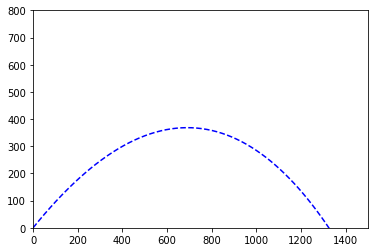

In [103]:
import numpy
from matplotlib import pyplot as plt
n_steps = 1000

#thetas = range(5, 90, 5) # the angles in degrees
z=16
for i in range(z)
    angle = i*5*numpy.pi/180
    initial_conditions = [0, 0, 125*numpy.cos(angle), 125*numpy.sin(angle)]    
    values_euler = solve_euler(initial_conditions, 300, n_steps)
    xs_euler, ys_euler = values_euler[:,0], values_euler[:,1]
    plt.plot(xs_euler, ys_euler, color='blue', linestyle='--')
    plt.xlim(0,1500)
    plt.ylim(0,800)
    plt.xlabel('Distance /m')
    plt.ylabel('Height /m')
    plt.title('Trajectory of canon ball for varying angles')

Create a plot to show the range for different values of the initial velocity. Use the same angle $\theta=60^\circ$ for all velocities. The plot should have axis labels and a title and legend. Produce one curve with and one curve without the effect of air resistance. [5 marks]


In [ ]:
n_steps = 1000
max_time = 300
v0s = numpy.linspace(50, 1000, 20)

ranges = []
ranges_noresistance = []
theta = numpy.deg2rad(60)
z=48
# Your code here
for i in range(z)
    v0 = 50+20*i
    initial_conditions = [0, 0, v0*numpy.cos(th), 125*numpy.sin(angle)]    
    values_euler = solve_euler(initial_conditions, 300, n_steps)
    xs_euler, ys_euler = values_euler[:,0], values_euler[:,1]
    plt.plot(xs_euler, ys_euler, color='blue', linestyle='--')
    plt.xlim(0,1500)
    plt.ylim(0,800)
    plt.xlabel('Distance /m')
    plt.ylabel('Height /m')
    plt.title('Trajectory of canon ball for varying angles')